In [19]:
#Call the necessary libraries for data exploration and preprocessing
import pandas as pd # data manupulation and neumerical operation
import numpy as np # data manupulation and neumerical operation
import seaborn as sns # data vizualization
import matplotlib.pyplot as plt # data vizualization
from sklearn.model_selection import train_test_split # for creating trainning and testing dataset
from sklearn.linear_model import LinearRegression # call the regression model from the libraray
from sklearn.metrics import mean_squared_error, r2_score # call the performance measure of your model
from sklearn.model_selection import cross_val_score # call the library for conducting validation test
from sklearn.preprocessing import StandardScaler # Call the library for Standardization of the features
from sklearn.feature_selection import RFE # call the library for feature selection

In [20]:
# read your data and store it into a dataframe
df = pd.read_excel("/Users/kamyasarda/Downloads/Jayalaxmi Aegrotech (1).xlsx", sheet_name="Regression Data")

In [21]:
# Start missing value tratment by finding the collumns with missing values
df.isnull().sum()

loan_amount                     0
loan_repaid                     0
crop_insured                    0
years_of_exp_in_sericulture     0
training_on_sericulture         0
krishi_pond                     0
borewell_recharge               0
rain_harvesting                 0
own_compost_manure              0
own_vermi_compost               0
trenching_mulching              0
bio_fertilizers                 0
mechanization                   0
mulberry_diseases               0
affected_by_pest                0
rearing_cost                    0
instrument_mgmt_cost            0
temp_mgmt                       0
humidity_mgmt                   0
airvent_temp_mgmt               0
rotary_mounting                 0
seri_total_subsidy              0
income_per_acre                 0
chawki_bivol                    0
rearing_cost_missing           20
dtype: int64

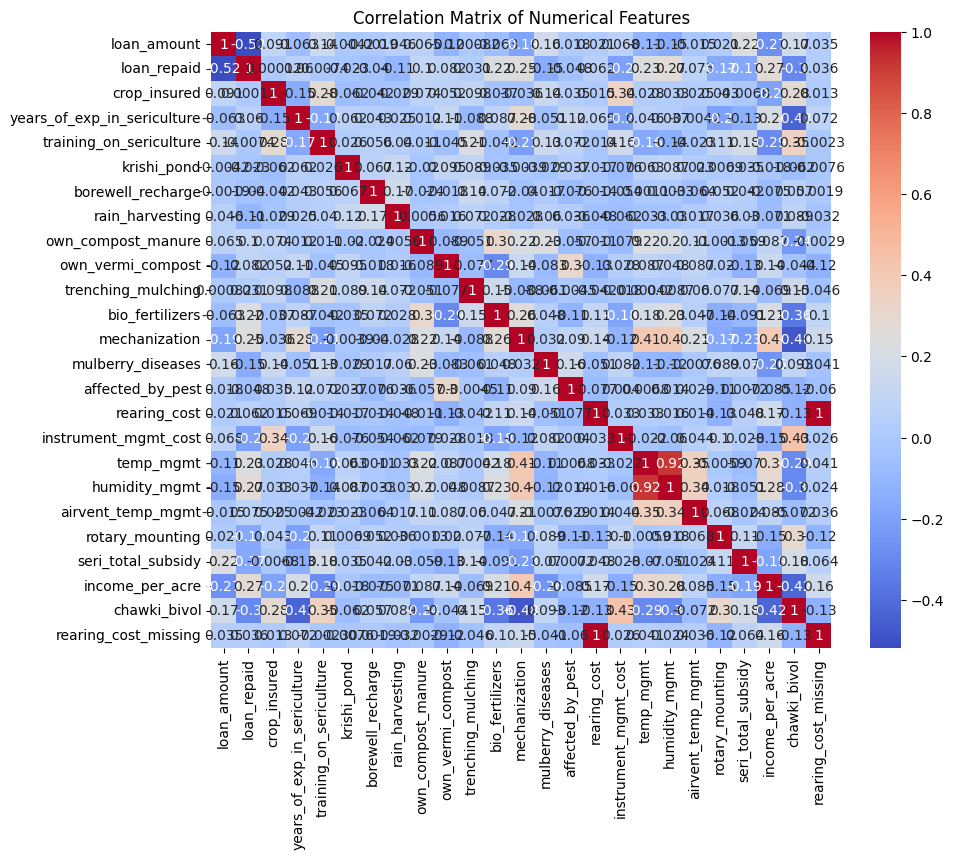

In [22]:
#Show the correlation value between the features
s=df.select_dtypes(include="number").corr()
#Correlation plot
plt.figure(figsize=(10,8)) # Increased figure size for better readability
sns.heatmap(s,annot= True, cmap='coolwarm') # Added cmap for better visual distinction
plt.title('Correlation Matrix of Numerical Features') # Added a title
plt.show()

In [23]:
# Selecting features for salary prediction
X_reg = df.drop(columns=['income_per_acre','rearing_cost_missing']) # Assign the set of features inside x_reg list
y_reg = df['income_per_acre'] # Assign the dependent variable inside the y_reg list

In [24]:
# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.15, random_state=42)

In [25]:
# Standardization of the features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [26]:
# Create list of selected feature names using RFE 
model = LinearRegression()
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
selector = selector.fit(X_train_reg_scaled, y_train_reg)

In [27]:
# Linear Regression Model
lin_reg = LinearRegression()

# Fit the linear regression model using the scaled and imputed training data
lin_reg.fit(X_train_reg_scaled, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Find the regression coefficients and intercept
print("Regression Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Regression Coefficients: [-4908.15823644   662.96862729 -3605.12057936  1037.31100582
 -3581.26064297 -1231.69482905 -2547.04994547   104.03676567
  1257.8337578   5426.27769881   555.57913771  2266.57214274
  7034.72744594 -4916.72165027 -5424.38249861  3596.03450918
  1156.66152166  2763.5723566   1106.47018751  -793.03692533
 -2292.61632433  -711.79333139 -6507.42989994]
Intercept: 46642.903514755686


In [29]:
# Predictions and evaluation
y_pred_reg = lin_reg.predict(X_test_reg_scaled)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Salary Prediction - Mean Squared Error: {mse:.2f}")
print(f"Salary Prediction - R2 Score: {r2:.4f}")

Salary Prediction - Mean Squared Error: 957039009.04
Salary Prediction - R2 Score: 0.3451


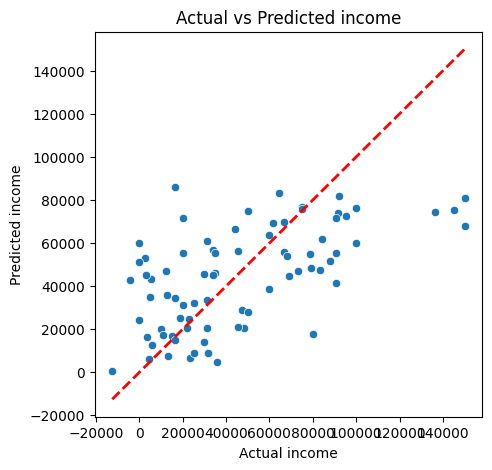

In [30]:
# Plot actual vs predicted salaries
plt.figure(figsize=(5, 5))# change the plot size as per your need
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel("Actual income") #label your horizontal axis
plt.ylabel("Predicted income") #label your verticle axis
plt.title("Actual vs Predicted income") # Title of the plot

# Add the fit line (line of perfect prediction)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2) # 'r--' for red dashed line

plt.show()# Show the plot

In [31]:
# Perform 5-fold cross-validation
scores = cross_val_score(lin_reg, X_reg, y_reg, cv=10, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R2 scores:", scores)

Cross-validation R2 scores: [-0.72321799 -0.3633507  -0.29912917 -0.18567829  0.0272732  -0.54548451
  0.29447308  0.36867628  0.33991867 -0.09076039]


In [32]:
# Calculate the average R2 score and standard deviation
print(f"Average R2 score: {scores.mean():.4f}")

Average R2 score: -0.1177


In [33]:
# Import Random Forest Regressor and SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Instantiate a Random Forest Regressor
# You can tune hyperparameters like n_estimators, max_depth, etc.
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model to the scaled training data
rf_reg.fit(X_train_reg_scaled, y_train_reg)

# Create a selector object that will use the random forest regressor to find
# features that have an importance of more than the mean importance of all features
selector = SelectFromModel(rf_reg, prefit=True)

# Transform the training and testing data to include only the selected features
X_train_reg_selected = selector.transform(X_train_reg_scaled)
X_test_reg_selected = selector.transform(X_test_reg_scaled)

print(f"Original number of features: {X_train_reg_scaled.shape[1]}")
print(f"Number of features after selection: {X_train_reg_selected.shape[1]}")

# Get the names of the selected features
selected_feature_names = X_reg.columns[selector.get_support()]
print("\nSelected features:")
for feature in selected_feature_names:
    print(feature)

Original number of features: 23
Number of features after selection: 8

Selected features:
loan_amount
years_of_exp_in_sericulture
mechanization
mulberry_diseases
rearing_cost
instrument_mgmt_cost
seri_total_subsidy
chawki_bivol


In [34]:
# Create reduced feature matrices using selected features
X_train_selected = X_train_reg[selected_feature_names]
X_test_selected = X_test_reg[selected_feature_names]


In [35]:
# Create list of selected feature names
selected_features = list(X_reg.columns[selector.get_support()])


In [36]:
print("Selected features:")
for f in selected_features:
    print("-", f)


Selected features:
- loan_amount
- years_of_exp_in_sericulture
- mechanization
- mulberry_diseases
- rearing_cost
- instrument_mgmt_cost
- seri_total_subsidy
- chawki_bivol


In [37]:
X_train_selected = X_train_reg[selected_features]
X_test_selected = X_test_reg[selected_features]
